In [70]:
library('caret')

# KNN Regression

In [71]:
set.seed(123123123)
N_train = 5
K = 5

x = runif(N_train)
y = 3*x+5+rnorm(length(x),0,1/10)
df = data.frame(x=x,y=y)

knn_mod = knnreg(y~.,data=df,k=K)
xe = data.frame(x=sort(runif(1000)))
xe_pred = predict(knn_mod,xe)

Warning message in plot.window(...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"size" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"size" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"size" is not a graphical parameter”
Warning message in box(...):
“"size" is not a graphical parameter”
Warning message in title(...):
“"size" is not a graphical parameter”


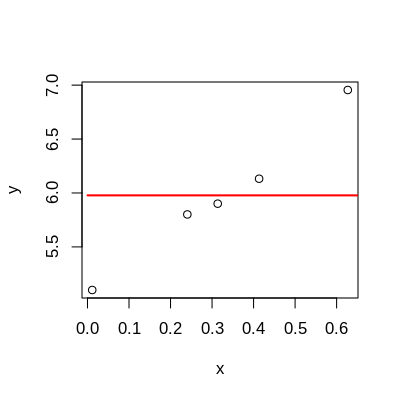

In [72]:
plot(x,y,size=5)
lines(xe$x,xe_pred,col='red',type='l',lwd=2)

# simulation

In [73]:
x = sort(runif(100,-1,1))

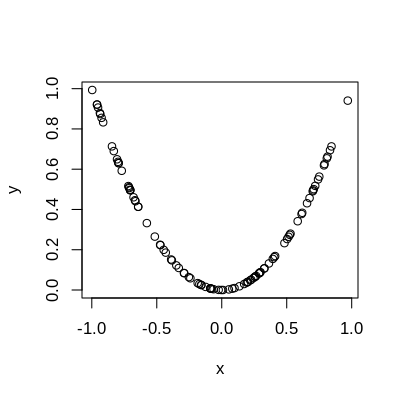

In [74]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)
y = x^2 # f(x) = x^2
plot(x,y)

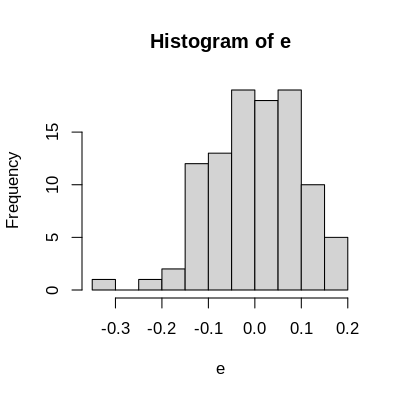

In [75]:
e = rnorm(100,0,1/10)
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 100)
hist(e)

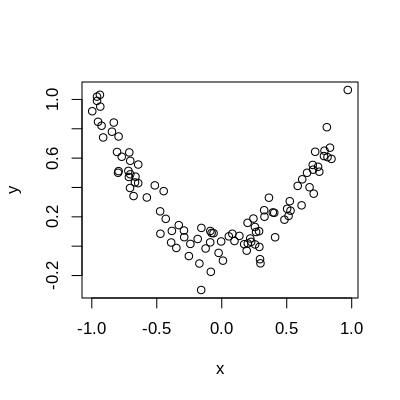

In [76]:
y = x^2 + e
plot(x,y)

# using linear regression

In [77]:
mod = lm(y~x) # y = b0 + b1*x
summary(mod)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63812 -0.25250 -0.03057  0.22306  0.88051 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.31766    0.03082  10.307   <2e-16 ***
x           -0.13809    0.05417  -2.549   0.0123 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3067 on 98 degrees of freedom
Multiple R-squared:  0.06219,	Adjusted R-squared:  0.05262 
F-statistic: 6.498 on 1 and 98 DF,  p-value: 0.01235


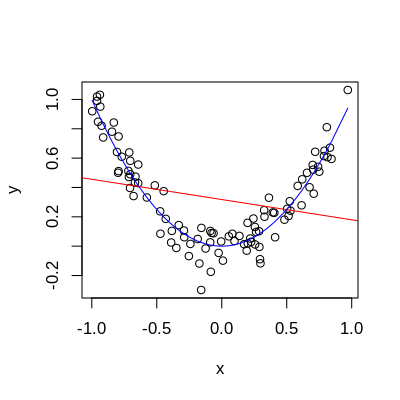

In [78]:
plot(x,y)
abline(coef(mod),col='red')
lines(x,x^2,col='blue')

# KNN

In [79]:
?knnreg

knnreg {caret},R Documentation
x,a matrix or data frame of training set predictors.
...,additional parameters to pass to knnregTrain.
formula,a formula of the form lhs ~ rhs where lhs is the response variable and rhs a set of predictors.
data,optional data frame containing the variables in the model formula.
subset,optional vector specifying a subset of observations to be used.
na.action,function which indicates what should happen when the data contain NAs.
k,number of neighbours considered.
y,a numeric vector of outcomes.
train,matrix or data frame of training set cases.
test,matrix or data frame of test set cases. A vector will be interpreted as a row vector for a single case.


In [80]:
df = data.frame(x=x,y=y)
knn_mod = knnreg(y~.,data=df,k=10)

In [81]:
xe = data.frame(x=sort(runif(1000,-1.5,1.5)))

In [82]:
head(sample(predict(knn_mod,xe)))

[1] 0.01301158 0.67042884 0.89432696 0.89432696 0.89432696 0.49510755

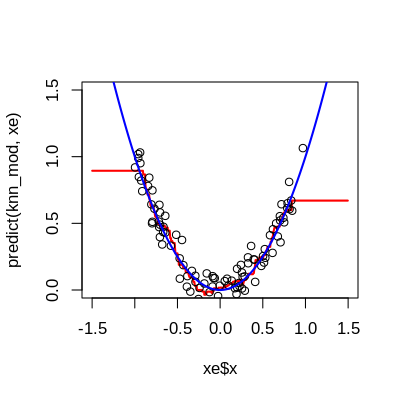

In [83]:
plot(xe$x,predict(knn_mod,xe),col='red',lwd=2,type='l',ylim=c(0,1.5))
points(x,y)
lines(xe$x,xe$x^2,col='blue',lwd=2)

## k = 3

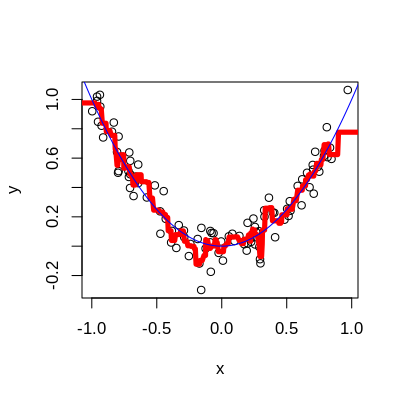

In [85]:
knn_mod = knnreg(y~.,data=df,k=3)
plot(x,y)
lines(xe$x,predict(knn_mod,xe),col='red',lwd=5)
lines(xe$x,xe$x^2,col='blue')

# k = 1

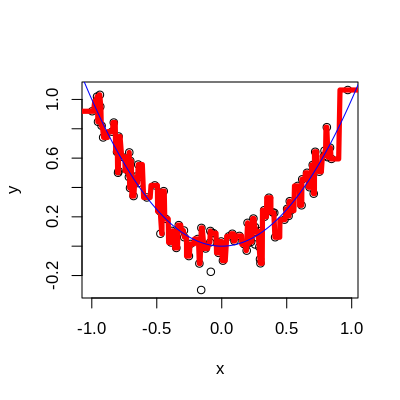

In [86]:
knn_mod = knnreg(y~.,data=df,k=1)
plot(x,y)
lines(xe$x,predict(knn_mod,xe),col='red',lwd=5)
lines(xe$x,xe$x^2,col='blue')

# k = 50

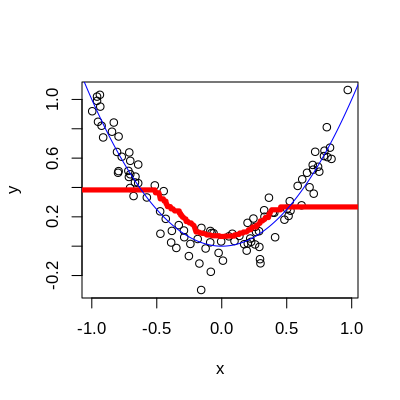

In [87]:
knn_mod = knnreg(y~.,data=df,k=50)
plot(x,y)
lines(xe$x,predict(knn_mod,xe),col='red',lwd=5)
lines(xe$x,xe$x^2,col='blue')

# k = 100

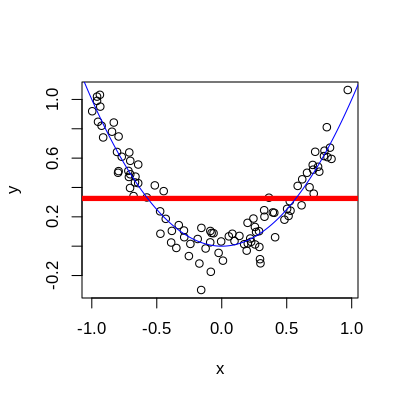

In [88]:
knn_mod = knnreg(y~.,data=df,k=100)
plot(x,y)
lines(xe$x,predict(knn_mod,xe),col='red',lwd=5)
lines(xe$x,xe$x^2,col='blue')

In [89]:
mean(y)

[1] 0.3253369

In [90]:
head(predict(knn_mod))

[1] 0.3253369 0.3253369 0.3253369 0.3253369 0.3253369 0.3253369